In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Liu's Data Imported and Formatted

In [2]:
Calcite_liu_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/Liu_data/Calcite.csv"
Siderite_liu_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/Liu_data/Siderite.csv"
Magnesite_liu_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/Liu_data/Magnesite.csv"

Calcite_liu_df = pd.read_csv(Calcite_liu_path)
Siderite_liu_df = pd.read_csv(Siderite_liu_path)
Magnesite_liu_df = pd.read_csv(Magnesite_liu_path)

In [3]:
def df_interpreter(df, mineral, basalt):
    df = df.filter(["Time", mineral, "Basalt"])
    df = df[df["Basalt"] == basalt]
    x = df.Time
    y = df[mineral]
    return x, y

In [4]:
xy_FB_CalVol_liu = df_interpreter(Calcite_liu_df, "Calcite", "FB")
xy_FB_SidVol_liu = df_interpreter(Siderite_liu_df, "Siderite", "FB")
xy_FB_MagVol_liu = df_interpreter(Magnesite_liu_df, "Magnesite", "FB")

xy_MB_CalVol_liu = df_interpreter(Calcite_liu_df, "Calcite", "MB")
xy_MB_SidVol_liu = df_interpreter(Siderite_liu_df, "Siderite", "MB")
xy_MB_MagVol_liu = df_interpreter(Magnesite_liu_df, "Magnesite", "MB")

xy_SB_CalVol_liu = df_interpreter(Calcite_liu_df, "Calcite", "SB")
xy_SB_SidVol_liu = df_interpreter(Siderite_liu_df, "Siderite", "SB")
xy_SB_MagVol_liu = df_interpreter(Magnesite_liu_df, "Magnesite", "SB")

In [5]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [6]:
x_FB_CalVol_norm_liu = xy_FB_CalVol_liu[0]
x_FB_SidVol_norm_liu = xy_FB_SidVol_liu[0]
x_FB_MagVol_norm_liu = xy_FB_MagVol_liu[0]

x_MB_CalVol_norm_liu = xy_MB_CalVol_liu[0]
x_MB_SidVol_norm_liu = xy_MB_SidVol_liu[0]
x_MB_MagVol_norm_liu = xy_MB_MagVol_liu[0]

x_SB_CalVol_norm_liu = xy_SB_CalVol_liu[0]
x_SB_SidVol_norm_liu = xy_SB_SidVol_liu[0]
x_SB_MagVol_norm_liu = xy_SB_MagVol_liu[0]

y_FB_CalVol_norm_liu = NormalizeData(xy_FB_CalVol_liu[1], min(xy_FB_CalVol_liu[1]), max(xy_FB_CalVol_liu[1]))
y_FB_SidVol_norm_liu = NormalizeData(xy_FB_SidVol_liu[1], min(xy_FB_SidVol_liu[1]), max(xy_FB_SidVol_liu[1]))
y_FB_MagVol_norm_liu = NormalizeData(xy_FB_MagVol_liu[1], min(xy_FB_MagVol_liu[1]), max(xy_FB_MagVol_liu[1]))

y_MB_CalVol_norm_liu = NormalizeData(xy_MB_CalVol_liu[1], min(xy_MB_CalVol_liu[1]), max(xy_MB_CalVol_liu[1]))
y_MB_SidVol_norm_liu = NormalizeData(xy_MB_SidVol_liu[1], min(xy_MB_SidVol_liu[1]), max(xy_MB_SidVol_liu[1]))
y_MB_MagVol_norm_liu = NormalizeData(xy_MB_MagVol_liu[1], min(xy_MB_MagVol_liu[1]), max(xy_MB_MagVol_liu[1]))

y_SB_CalVol_norm_liu = NormalizeData(xy_SB_CalVol_liu[1], min(xy_SB_CalVol_liu[1]), max(xy_SB_CalVol_liu[1]))
y_SB_SidVol_norm_liu = NormalizeData(xy_SB_SidVol_liu[1], min(xy_SB_SidVol_liu[1]), max(xy_SB_SidVol_liu[1]))
y_SB_MagVol_norm_liu = NormalizeData(xy_SB_MagVol_liu[1], min(xy_SB_MagVol_liu[1]), max(xy_SB_MagVol_liu[1]))

# Dodd's Data Imported and Formatted

In [7]:
def data_cats(directory):
    os.chdir(directory)
    f_list = glob('*.csv')
    f_list = [i.rstrip('.csv') for i in f_list]
    f_list = [i.rstrip('0123456789') for i in f_list]
    f_set = set(f_list)
    output_total = len(f_list) / len(f_set)
    return f_set, int(output_total)

In [8]:
def time_finder(in_file_path):
    with open(in_file_path) as f:
        t = f.read().strip()
    m = re.findall(r"^spatial_profile.+?$", t, re.MULTILINE)
    m = m[0]
    m = m.split()
    m = m[1:]
    m.append("1E-12")
    m_float = [float(x) for x in m]
    return m_float

In [9]:
# Iterate through all the files in order, generating dataframes that need compiling.
def csv_dfer(directory, in_file_path):
    catList, max_time = data_cats(directory)
    times = time_finder(in_file_path)
    metric_final_dataframes = []
    for _ in catList:
        metric_dataframes = []
        for __,___ in zip(range(max_time), times):
            df = pd.read_csv(directory + "/" + str(_) + str(__+1) + ".csv")
            df["timestep"] = str(___)
            metric_dataframes.append(df)
        df = pd.concat(metric_dataframes)
        df["metric"] = str(_)
        metric_final_dataframes.append(df)
    final_df = pd.concat(metric_final_dataframes)
    return final_df

In [10]:
infile_path_FB = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/bcm/2022-05-20_bcm_3-0/basalt.in"
infile_path_MB = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Easter/MRes/CrunchFlow_Work/bcm/2022-05-20_bcm_3-1/basalt.in"
infile_path_SB = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Easter/MRes/CrunchFlow_Work/bcm/2022-05-20_bcm_3-2/basalt.in"

directory_path_FB = (infile_path_FB.replace('/basalt.in','')) + "/tec2csv"
directory_path_MB = (infile_path_MB.replace('/basalt.in','')) + "/tec2csv"
directory_path_SB = (infile_path_SB.replace('/basalt.in','')) + "/tec2csv"

df_FB = csv_dfer(directory_path_FB, infile_path_FB)
df_MB = csv_dfer(directory_path_MB, infile_path_MB)
df_SB = csv_dfer(directory_path_SB, infile_path_SB)

In [11]:
def df_prepper(df, mineral, metric):
    df = df.filter(["timestep", "metric", mineral])
    df = df.dropna(axis=0)
    df = df[df["metric"] == metric]
    df = df.drop("metric", axis=1)
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    df = df.astype(float)
    x = df.timestep
    y = df[mineral]
    return x, y

In [12]:
xy_FB_CalVol_Dodd = df_prepper(df_FB, "Calcite", "volume")
xy_FB_SidVol_Dodd = df_prepper(df_FB, "Siderite", "volume")
xy_FB_MagVol_Dodd = df_prepper(df_FB, "Magnesite", "volume")

x_FB_CalVol_norm_Dodd = xy_FB_CalVol_Dodd[0]
x_FB_SidVol_norm_Dodd = xy_FB_SidVol_Dodd[0]
x_FB_MagVol_norm_Dodd = xy_FB_MagVol_Dodd[0]

y_FB_CalVol_norm_Dodd = NormalizeData(xy_FB_CalVol_Dodd[1], min(xy_FB_CalVol_Dodd[1]), max(xy_FB_CalVol_Dodd[1]))
y_FB_SidVol_norm_Dodd = NormalizeData(xy_FB_SidVol_Dodd[1], min(xy_FB_SidVol_Dodd[1]), max(xy_FB_SidVol_Dodd[1]))
y_FB_MagVol_norm_Dodd = NormalizeData(xy_FB_MagVol_Dodd[1], min(xy_FB_MagVol_Dodd[1]), max(xy_FB_MagVol_Dodd[1]))

Text(0, 0.5, 'Liu - Mineral Volume (Norm.)')

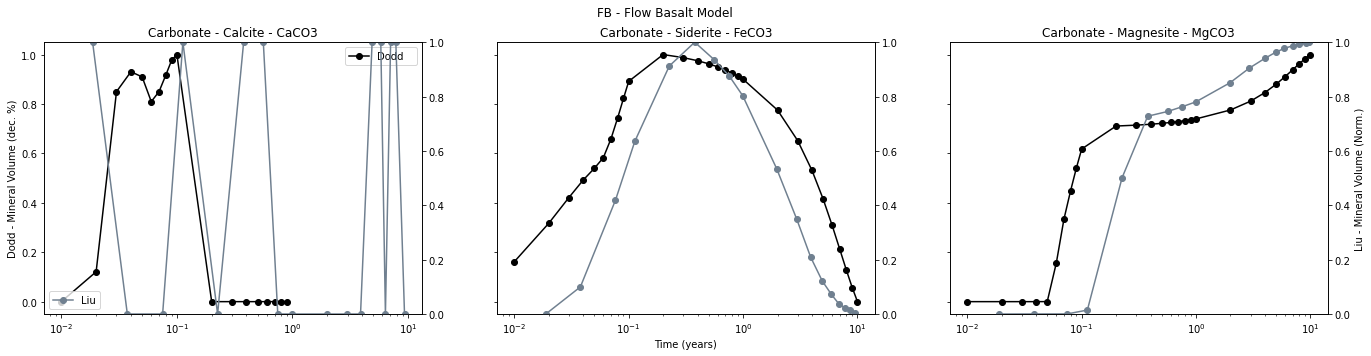

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.suptitle('FB - Flow Basalt Model')

fig.set_figheight(5)
fig.set_figwidth(23)

ax1.plot(x_FB_CalVol_norm_Dodd, y_FB_CalVol_norm_Dodd, color='black', marker='o', label='Dodd   ')
ax1.set_title("Carbonate - Calcite - CaCO3")
ax1.set_xscale("log")
ax1.set_ylabel('Dodd - Mineral Volume (dec. %)')
ax1.legend()
ax8 = ax1.twinx()
ax8.plot(x_FB_CalVol_norm_liu, y_FB_CalVol_norm_liu, color='slategrey', marker='o', label='Liu')
ax8.set_ylim(top=1, bottom=0)
ax8.legend()

ax2.plot(x_FB_SidVol_norm_Dodd, y_FB_SidVol_norm_Dodd, color='black', marker='o')
ax2.set_title("Carbonate - Siderite - FeCO3")
ax2.set_xscale("log")
ax2.set_xlabel('Time (years)')
ax9 = ax2.twinx()
ax9.plot(x_FB_SidVol_norm_liu, y_FB_SidVol_norm_liu, color='slategrey', marker='o')
ax9.set_ylim(top=1, bottom=0)

ax3.plot(x_FB_MagVol_norm_Dodd, y_FB_MagVol_norm_Dodd, color='black', marker='o')
ax3.set_title("Carbonate - Magnesite - MgCO3")
ax3.set_xscale("log")
ax10 = ax3.twinx()
ax10.plot(x_FB_MagVol_norm_liu, y_FB_MagVol_norm_liu, color='slategrey', marker='o')
ax10.set_ylim(top=1, bottom=0)
ax10.set_ylabel('Liu - Mineral Volume (Norm.)')

In [14]:
xy_MB_CalVol_Dodd = df_prepper(df_MB, "Calcite", "volume")
xy_MB_SidVol_Dodd = df_prepper(df_MB, "Siderite", "volume")
xy_MB_MagVol_Dodd = df_prepper(df_MB, "Magnesite", "volume")

x_MB_CalVol_norm_Dodd = xy_MB_CalVol_Dodd[0]
x_MB_SidVol_norm_Dodd = xy_MB_SidVol_Dodd[0]
x_MB_MagVol_norm_Dodd = xy_MB_MagVol_Dodd[0]

y_MB_CalVol_norm_Dodd = NormalizeData(xy_MB_CalVol_Dodd[1], min(xy_MB_CalVol_Dodd[1]), max(xy_MB_CalVol_Dodd[1]))
y_MB_SidVol_norm_Dodd = NormalizeData(xy_MB_SidVol_Dodd[1], min(xy_MB_SidVol_Dodd[1]), max(xy_MB_SidVol_Dodd[1]))
y_MB_MagVol_norm_Dodd = NormalizeData(xy_MB_MagVol_Dodd[1], min(xy_MB_MagVol_Dodd[1]), max(xy_MB_MagVol_Dodd[1]))

Text(0, 0.5, 'Liu - Mineral Volume (Norm.)')

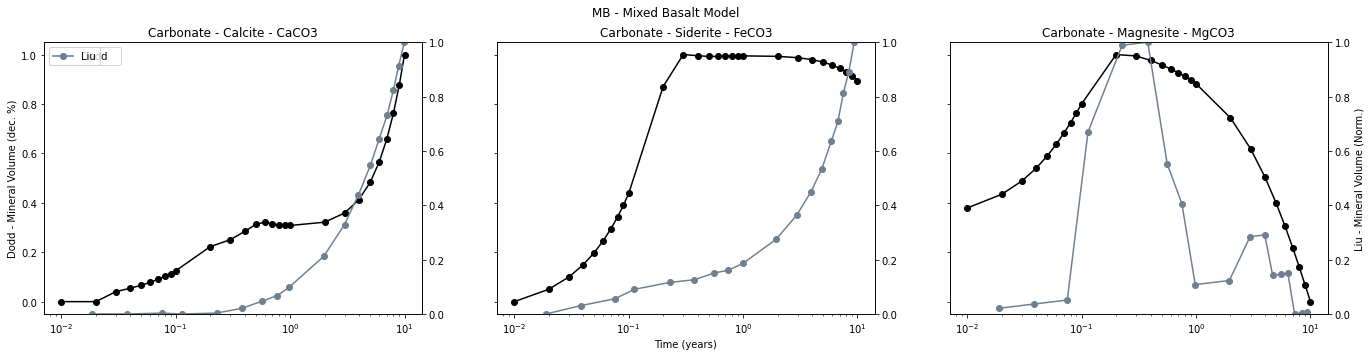

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.suptitle('MB - Mixed Basalt Model')

fig.set_figheight(5)
fig.set_figwidth(23)

ax1.plot(x_MB_CalVol_norm_Dodd, y_MB_CalVol_norm_Dodd, color='black', marker='o', label='Dodd   ')
ax1.set_title("Carbonate - Calcite - CaCO3")
ax1.set_xscale("log")
ax1.set_ylabel('Dodd - Mineral Volume (dec. %)')
ax1.legend()
ax8 = ax1.twinx()
ax8.plot(x_MB_CalVol_norm_liu, y_MB_CalVol_norm_liu, color='slategrey', marker='o', label='Liu')
ax8.set_ylim(top=1, bottom=0)
ax8.legend()

ax2.plot(x_MB_SidVol_norm_Dodd, y_MB_SidVol_norm_Dodd, color='black', marker='o')
ax2.set_title("Carbonate - Siderite - FeCO3")
ax2.set_xscale("log")
ax2.set_xlabel('Time (years)')
ax9 = ax2.twinx()
ax9.plot(x_MB_SidVol_norm_liu, y_MB_SidVol_norm_liu, color='slategrey', marker='o')
ax9.set_ylim(top=1, bottom=0)

ax3.plot(x_MB_MagVol_norm_Dodd, y_MB_MagVol_norm_Dodd, color='black', marker='o')
ax3.set_title("Carbonate - Magnesite - MgCO3")
ax3.set_xscale("log")
ax10 = ax3.twinx()
ax10.plot(x_MB_MagVol_norm_liu, y_MB_MagVol_norm_liu, color='slategrey', marker='o')
ax10.set_ylim(top=1, bottom=0)
ax10.set_ylabel('Liu - Mineral Volume (Norm.)')

In [16]:
xy_SB_CalVol_Dodd = df_prepper(df_SB, "Calcite", "volume")
xy_SB_SidVol_Dodd = df_prepper(df_SB, "Siderite", "volume")
xy_SB_MagVol_Dodd = df_prepper(df_SB, "Magnesite", "volume")

x_SB_CalVol_norm_Dodd = xy_SB_CalVol_Dodd[0]
x_SB_SidVol_norm_Dodd = xy_SB_SidVol_Dodd[0]
x_SB_MagVol_norm_Dodd = xy_SB_MagVol_Dodd[0]

y_SB_CalVol_norm_Dodd = NormalizeData(xy_SB_CalVol_Dodd[1], min(xy_SB_CalVol_Dodd[1]), max(xy_SB_CalVol_Dodd[1]))
y_SB_SidVol_norm_Dodd = NormalizeData(xy_SB_SidVol_Dodd[1], min(xy_SB_SidVol_Dodd[1]), max(xy_SB_SidVol_Dodd[1]))
y_SB_MagVol_norm_Dodd = NormalizeData(xy_SB_MagVol_Dodd[1], min(xy_SB_MagVol_Dodd[1]), max(xy_SB_MagVol_Dodd[1]))

Text(0, 0.5, 'Liu - Mineral Volume (Norm.)')

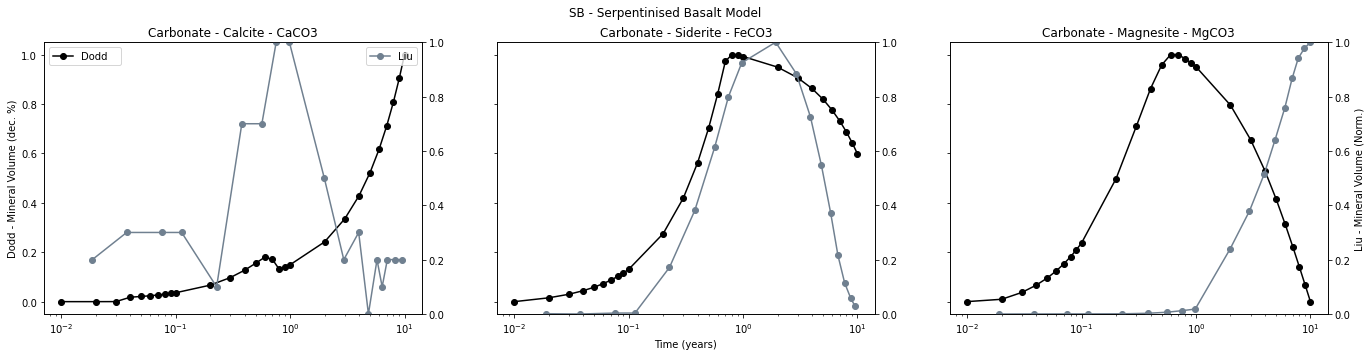

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.suptitle('SB - Serpentinised Basalt Model')

fig.set_figheight(5)
fig.set_figwidth(23)

ax1.plot(x_SB_CalVol_norm_Dodd, y_SB_CalVol_norm_Dodd, color='black', marker='o', label='Dodd   ')
ax1.set_title("Carbonate - Calcite - CaCO3")
ax1.set_xscale("log")
ax1.set_ylabel('Dodd - Mineral Volume (dec. %)')
ax1.legend()
ax8 = ax1.twinx()
ax8.plot(x_SB_CalVol_norm_liu, y_SB_CalVol_norm_liu, color='slategrey', marker='o', label='Liu')
ax8.set_ylim(top=1, bottom=0)
ax8.legend()

ax2.plot(x_SB_SidVol_norm_Dodd, y_SB_SidVol_norm_Dodd, color='black', marker='o')
ax2.set_title("Carbonate - Siderite - FeCO3")
ax2.set_xscale("log")
ax2.set_xlabel('Time (years)')
ax9 = ax2.twinx()
ax9.plot(x_SB_SidVol_norm_liu, y_SB_SidVol_norm_liu, color='slategrey', marker='o')
ax9.set_ylim(top=1, bottom=0)

ax3.plot(x_SB_MagVol_norm_Dodd, y_SB_MagVol_norm_Dodd, color='black', marker='o')
ax3.set_title("Carbonate - Magnesite - MgCO3")
ax3.set_xscale("log")
ax10 = ax3.twinx()
ax10.plot(x_SB_MagVol_norm_liu, y_SB_MagVol_norm_liu, color='slategrey', marker='o')
ax10.set_ylim(top=1, bottom=0)
ax10.set_ylabel('Liu - Mineral Volume (Norm.)')